# Input of data from Copernicus Data Store (CDS)

In [ ]:
#To install Copernicus Data Store (CDS) api, we used the following command
#conda install -c conda-forge cdsapi

In [ ]:
'''
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': [
            '2m_temperature', 'total_precipitation', 'volumetric_soil_water_layer_1',
        ],
        'year': [
            '2000', '2019',
        ],
        'month': '12',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    'download.nc')
'''
#We used the website to download the data instead of using the above commands (both options were equally convenient).

In [18]:
import xarray as ar
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
from scipy import interpolate
from scipy.stats import kurtosis
from scipy.stats import skew
from numpy import mean
from numpy import median

# Basic attributes of the dataset

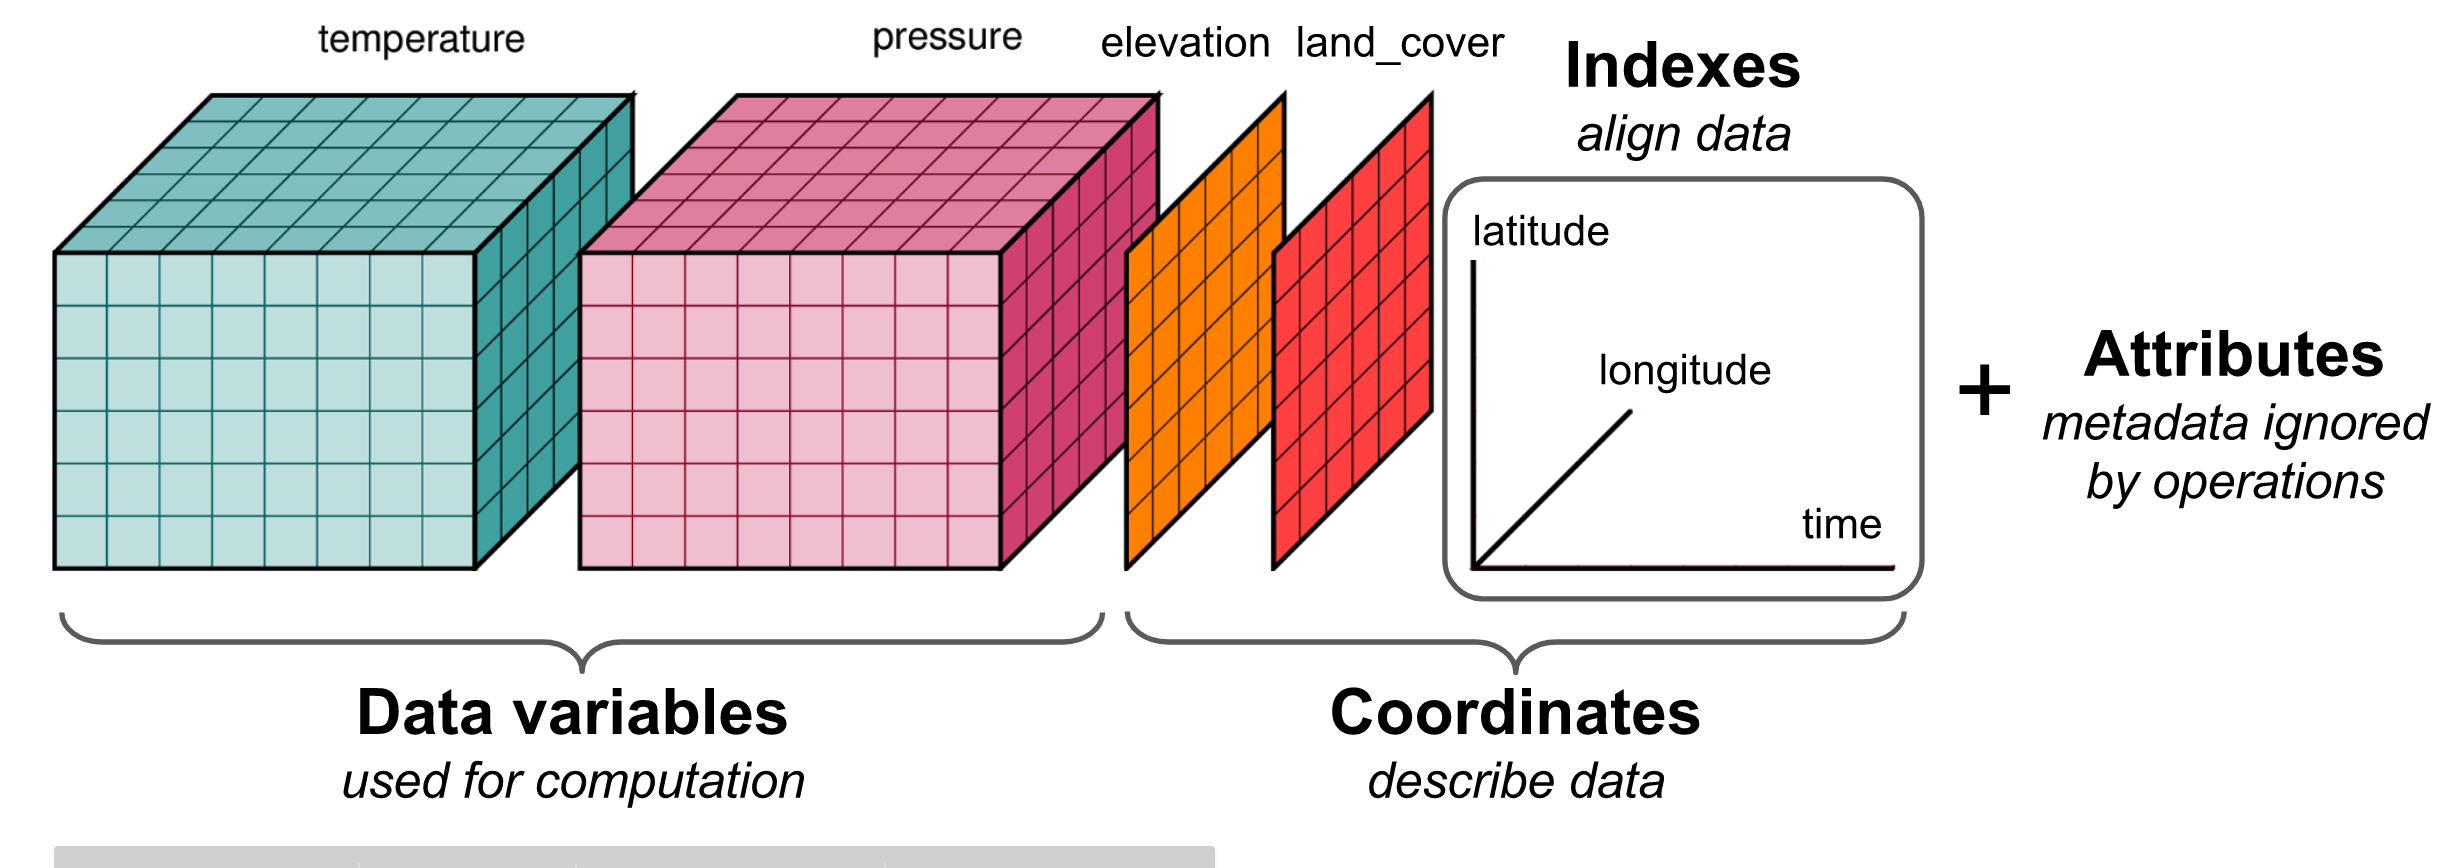

Image Source: http://matthewrocklin.com/

In [2]:
ds = ar.open_dataset('datafile.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-08-14 16:41:20 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

# Exploring and Visualising Geospatial Data

Following code cell shows plots of each attribute for a randomly chosen day

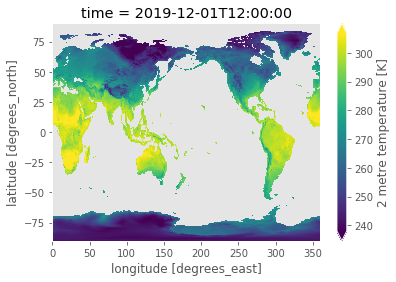

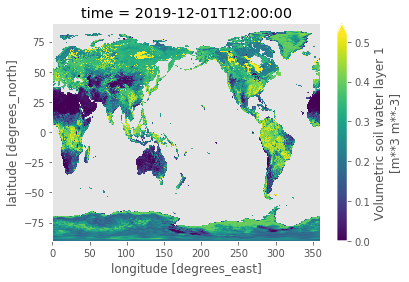

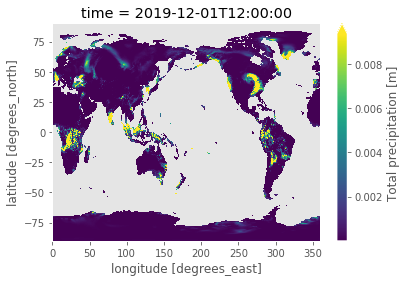

In [3]:
#Two meter temperature plot
t2m = ds["t2m"]
oneday = t2m.sel(time = '2019-12-01')
oneday.plot(robust=True)
plt.show()

#Volumetric soil water (layer-1) plot
swvl1 = ds["swvl1"]
oneday = swvl1.sel(time = '2019-12-01')
oneday.plot(robust=True)
plt.show()

#Total precipitation plot
tp = ds["tp"]
oneday = tp.sel(time = '2019-12-01')
oneday.plot(robust=True)
plt.show()

In the above images we can see the range of each feature variation in the form of colour scheme. We can see that the "Two meter temprature" values are in the order of hundreds, while "Volumetric soil water (layer-1)" value lies in order of first decimal place. In case of "Total precipitation" its values lie in the order of third decimal place.

We need to normalize the dataset such that gradient descent works well to give the desired output. Also we need to replace all the Nan values (We will do this in the preprocessing step).

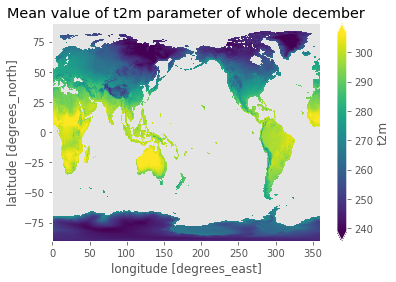

In [5]:
#Here we calculated mean of all the t2m data recorded in the month of december
t2m_sum = ar.zeros_like(t2m[0])
for i in range(31):
    t2m_sum += t2m[i,:,:]
t2m_mean = t2m_sum/31

#Now we will plot the mean value of t2m parameter over the whole month of december
daymean = t2m_mean
daymean.plot(robust=True)
plt.title("Mean value of t2m parameter of whole december");
plt.show()

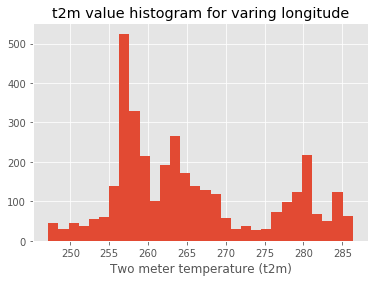

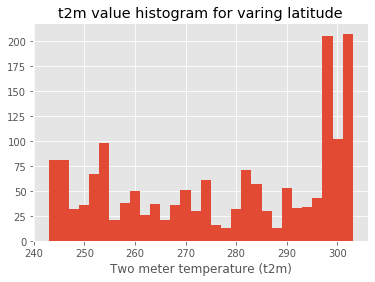

In [7]:
#Plotting histogram for t2m feature (Two meter temperature)
hist = []
for i in range(3600):
    ddd = t2m_mean[:,i].mean()
    hist.append(ddd)
    
plt.hist(hist, bins  = 30);
plt.xlabel("Two meter temperature (t2m)");
plt.title("t2m value histogram for varing longitude");
plt.show();

hist2 = []
for i in range(1800):
    ddd = t2m_mean[i,:].mean()
    hist2.append(ddd)
    
plt.hist(hist2, bins  = 30);
plt.xlabel("Two meter temperature (t2m)");
plt.title("t2m value histogram for varing latitude");
plt.show();

In the plots shown above, the first one is the histogram plot of two meter temperature (t2m) mean values of all the recorded data in 31 days, varing with longitude. We can conclude that maximum amount of t2m data lie in the range of 255-270K.

The second plot is the histogram plot of t2m mean values of all the recorded data in 31 days, varing with latitude. We can conclude that maximum amount of t2m data lie in the range of 290-302K.

In [8]:
#Calculating mean and median of the mean t2m data varing with latitude
hist1 = ~ np.isnan(np.array(hist))  #Here we are excluding Nan values for calculation
hist_1 = np.array(hist)[hist1]
sample_mean = mean(hist_1)
sample_median = median(hist_1)
print("The t2m mean of the averaged data (with latitudnal variation):",sample_mean)
print("The t2m median of the averaged data (with latitudnal variation):",sample_median)

#Calculating mean and median of the mean t2m data varing with longitude
hist22 = ~ np.isnan(np.array(hist2)) #Here we are excluding Nan values for calculation
hist_2 = np.array(hist2)[hist22]
sample_mean = mean(hist_2)
sample_median = median(hist_2)
print("The t2m mean of the averaged data (with longitudnal variation):",sample_mean)
print("The t2m median of the averaged data (with longitudnal variation):",sample_median)

The t2m mean of the averaged data (with latitudnal variation): 265.295
The t2m median of the averaged data (with latitudnal variation): 262.91602
The t2m mean of the averaged data (with longitudnal variation): 277.36533
The t2m median of the averaged data (with longitudnal variation): 281.38705


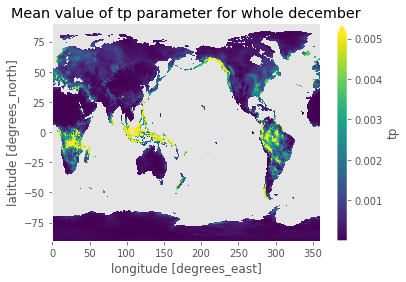

In [9]:
#Here we calculated mean of all the tp data recorded in the month of december
tp_sum = ar.zeros_like(tp[0])
for i in range(31):
    tp_sum += tp[i,:,:]
tp_mean = tp_sum/31

#Now we will plot the mean value of tp parameter over the whole month of december
daymean = tp_mean
daymean.plot(robust=True)
plt.title("Mean value of tp parameter for whole december");
plt.show()

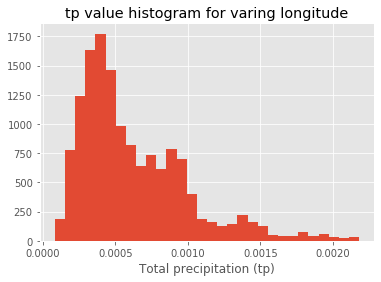

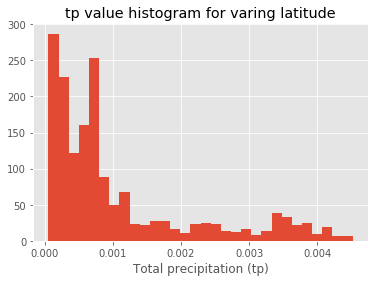

In [10]:
#Plotting histogram for tp feature (Total precipitation)
hist = []
for i in range(3600):
    ddd = tp_mean[:,i].mean()
    hist.append(ddd)
    
plt.hist(hist, bins  = 30, density=True);
plt.xlabel("Total precipitation (tp)");
plt.title("tp value histogram for varing longitude");
plt.show();

hist2 = []
for i in range(1800):
    ddd = tp_mean[i,:].mean()
    hist2.append(ddd)
    
plt.hist(hist2, bins  = 30);
plt.xlabel("Total precipitation (tp)");
plt.title("tp value histogram for varing latitude");
plt.show();

In the plots shown above, the first one is the histogram plot of total precipitation (tp) mean values of all the recorded data in 31 days, varing with longitude. We can conclude that maximum amount of tp data lie in the range of 0.0001-0.0010m.

The second plot is the histogram plot of tp mean values of all the recorded data in 31 days, varing with latitude. We can conclude that maximum amount of tp data lie in the range of 0.000-0.0012m.

In [11]:
#Calculating mean and median of the mean tp data varing with latitude
hist1 = ~ np.isnan(np.array(hist))  #Here we are excluding Nan values for calculation
hist_1 = np.array(hist)[hist1]
sample_mean = mean(hist_1)
sample_median = median(hist_1)
print("The tp mean of the averaged data (with latitudnal variation):",sample_mean)
print("The tp median of the averaged data (with latitudnal variation):",sample_median)

#Calculating mean and median of the mean tp data varing with longitude
hist22 = ~ np.isnan(np.array(hist2)) #Here we are excluding Nan values for calculation
hist_2 = np.array(hist2)[hist22]
sample_mean = mean(hist_2)
sample_median = median(hist_2)
print("The tp mean of the averaged data (with longitudnal variation):",sample_mean)
print("The tp median of the averaged data (with longitudnal variation):",sample_median)

The tp mean of the averaged data (with latitudnal variation): 0.0006217432
The tp median of the averaged data (with latitudnal variation): 0.0005055127
The tp mean of the averaged data (with longitudnal variation): 0.001066178
The tp median of the averaged data (with longitudnal variation): 0.0006939256


In [12]:
print( 'Excess kurtosis of the averaged data (with latitudnal variation) (for normal distribution its value is 0): {}'.format( kurtosis(hist_1) ))
print( 'Skewness of of the averaged data (with latitudnal variation) (for normal distribution its value is 0): {}'.format( skew(hist_1) ))

print( 'Excess kurtosis of the averaged data (with longitudnal variation) (for normal distribution its value is 0): {}'.format( kurtosis(hist_2) ))
print( 'Skewness of of the averaged data (with longitudnal variation) (for normal distribution its value is 0): {}'.format( skew(hist_2) ))

Excess kurtosis of the averaged data (with latitudnal variation) (for normal distribution its value is 0): 1.8493859575304512
Skewness of of the averaged data (with latitudnal variation) (for normal distribution its value is 0): 1.3260009288787842
Excess kurtosis of the averaged data (with longitudnal variation) (for normal distribution its value is 0): 1.0324586158700928
Skewness of of the averaged data (with longitudnal variation) (for normal distribution its value is 0): 1.4702082872390747


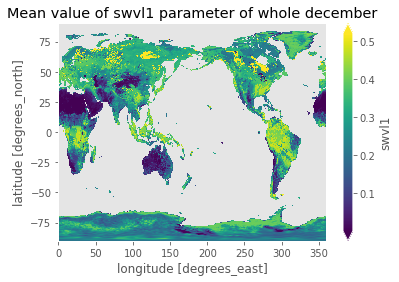

In [13]:
#Here we calculated mean of all the swvl1 data recorded in the month of december
swvl1_sum = ar.zeros_like(swvl1[0])
for i in range(31):
    swvl1_sum += swvl1[i,:,:]
swvl1_mean = swvl1_sum/31

#Now we will plot the mean value of swvl1 parameter over the whole month of december
daymean = swvl1_mean
daymean.plot(robust=True)
plt.title("Mean value of swvl1 parameter of whole december");
plt.show()

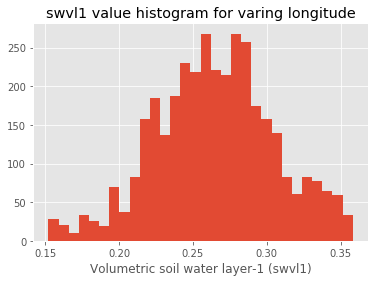

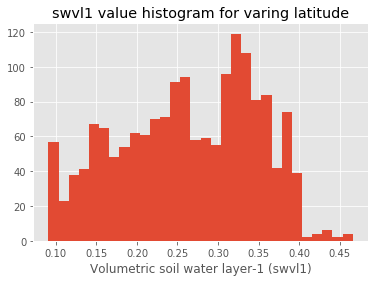

In [14]:
#Plotting histogram for swvl1 feature (Volumetric soil water layer-1)
hist = []
for i in range(3600):
    ddd = swvl1_mean[:,i].mean()
    hist.append(ddd)
    
plt.hist(hist, bins  = 30);
plt.xlabel("Volumetric soil water layer-1 (swvl1)");
plt.title("swvl1 value histogram for varing longitude");
plt.show();

hist2 = []
for i in range(1800):
    ddd = swvl1_mean[i,:].mean()
    hist2.append(ddd)
    
plt.hist(hist2, bins  = 30);
plt.xlabel("Volumetric soil water layer-1 (swvl1)");
plt.title("swvl1 value histogram for varing latitude");
plt.show();

In the plots shown above, the first one is the histogram plot of volumetric soil water layer-1  (swvl1) mean values of all the recorded data in 31 days, varing with longitude. We can conclude that the data is normally distributed maximum values lie within the range of 0.20-0.30m3 m-3.

The second plot is the histogram plot of swvl1 mean values of all the recorded data in 31 days, varing with latitude. We can conclude that the data is nearly distributed over the whole region of values ranging from 0.10-0.40 m3 m-3.

In [15]:
#Calculating mean and median of the mean swvl1 data varing with latitude
hist1 = ~ np.isnan(np.array(hist))  #Here we are excluding Nan values for calculation
hist_1 = np.array(hist)[hist1]
sample_mean = mean(hist_1)
sample_median = median(hist_1)
print("The swvl1 mean of the averaged data (with latitudnal variation):",sample_mean)
print("The swvl1 median of the averaged data (with latitudnal variation):",sample_median)

#Calculating mean and median of the mean swvl1 data varing with longitude
hist22 = ~ np.isnan(np.array(hist2)) #Here we are excluding Nan values for calculation
hist_2 = np.array(hist2)[hist22]
sample_mean = mean(hist_2)
sample_median = median(hist_2)
print("The swvl1 mean of the averaged data (with longitudnal variation):",sample_mean)
print("The swvl1 median of the averaged data (with longitudnal variation):",sample_median)

The swvl1 mean of the averaged data (with latitudnal variation): 0.26494914
The swvl1 median of the averaged data (with latitudnal variation): 0.26431048
The swvl1 mean of the averaged data (with longitudnal variation): 0.26241785
The swvl1 median of the averaged data (with longitudnal variation): 0.2652905



# Preprocessing Geospatial Data

In [16]:
#Now replacing all the NAN values with zeros
ds = ds.fillna(0)

Here we have to replace the Nan values with zeros otherwise gradient descent won't work well and calculation of loss function won't be possible.

Now we will see how our geospatial data looks after replacing NAN with zeros. For this we will plot each feature for a random day.

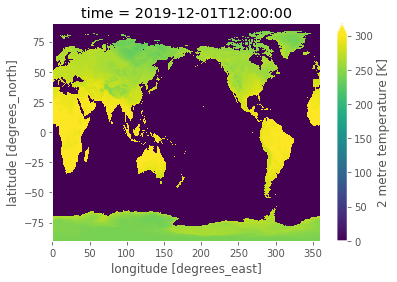

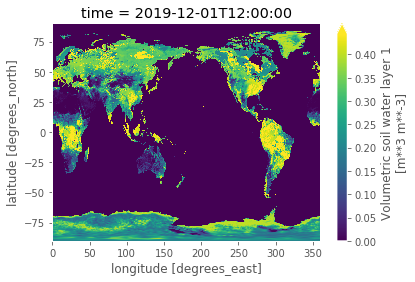

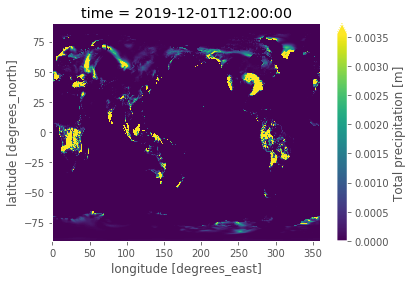

In [17]:
#Two meter temperature plot
t2m = ds["t2m"]
oneday = t2m.sel(time = '2019-12-01')
oneday.plot(robust=True)
plt.show()

#Volumetric soil water (layer-1) plot
swvl1 = ds["swvl1"]
oneday = swvl1.sel(time = '2019-12-01')
oneday.plot(robust=True)
plt.show()

#Total precipitation plot
tp = ds["tp"]
oneday = tp.sel(time = '2019-12-01')
oneday.plot(robust=True)
plt.show()

We can compare the above results with cell 4 outputs.

Now we will increase the spatial resolution through linear interpolation. 

Initial shape of array: (1801, 3600)
Final shape of array after linear interpolation: (3602, 7200)


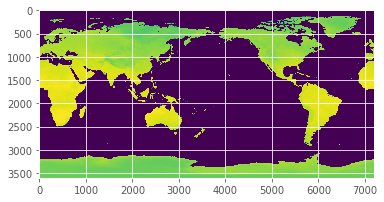

In [35]:
#Impmentation showing linear interpolation on a sample data 
mymin,mymax = 0,359.9
mymin2,mymax2 = 0,180
X = np.linspace(mymin,mymax,3600)
Y = np.linspace(mymin2,mymax2,1801)
                
test = np.array(t2m[0])
print("Initial shape of array:",test.shape)
f = interpolate.interp2d(X,Y,test, kind='linear')

Xnew = np.linspace(mymin,mymax,3600*2)
Ynew = np.linspace(mymin2,mymax2,1801*2)
test2 = f(Xnew,Ynew)
                
print ("Final shape of array after linear interpolation:", test2.shape)
#print(test2)
plt.imshow(test2)
#Note: Ignore the axis markings of the map we can re-mark it later with proper latitude and longitude.

In [ ]:
"""
mymin,mymax = 0,359.9
mymin2,mymax2 = 0,180
X = np.linspace(mymin,mymax,3600)
Y = np.linspace(mymin2,mymax2,1801)
Xnew = np.linspace(mymin,mymax,3600*2)
Ynew = np.linspace(mymin2,mymax2,1801*2)

t2m_data = []
tp_data = []
swvl1_data = []

for i in range(31):
    test1 = np.array(t2m[i])
    f = interpolate.interp2d(X,Y,test1, kind='linear')
    test11 = f(Xnew,Ynew)
    t2m_data.append(test11[i])
    
    
    test2 = np.array(tp[i])
    f2 = interpolate.interp2d(X,Y,test2, kind='linear')
    test22 = f2(Xnew,Ynew)
    tp_data.append(test22[i])
    
    
    test3 = np.array(swvl1[i])
    f3 = interpolate.interp2d(X,Y,test3, kind='linear')
    test33 = f3(Xnew,Ynew)
    swvl1_data.append(test33[i])
"""

Note: In the above cell we are creating the interpolated data. But we won't be using this dataset because of limited computation power.

# Deep Learning for Geospatial Data


In [39]:
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

"""
from keras.applications.vgg16 import VGG16
VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)

We could have used pretrained models like VGG16 directly but it allows only those input matrix which have 3 layers 
like in a RGB image. Here we have only two layers in input matrix i.e.; t2m and swvl1
"""

Here in the following cell we are normalizing the data so that out optimization algorithm works well. Based on the range of data observed in the cell 5 out, we will normalize it in the range of 0 to 1. 

In [42]:
#Normalization is defined as: X_norm = (X - X_min)/(X_max - X_min). Here in the following cases X_min = 0.
T2M = np.array(t2m)/(np.array(t2m).max())
TP = np.array(tp)/(np.array(tp).max())
SWVL1 = np.array(swvl1)/(np.array(swvl1).max())
#We are not using the upscaled image because of its computationally expensive nature (my computer couldn't handle it).

In [43]:
#Checking the maximum value after normalization
print(T2M.max())
print(TP.max())
print(SWVL1.max())

1.0
1.0
1.0


In [44]:
#Stacking the input data side by side
d = []
for i in range(len(t2m[:])):
    inp = np.dstack((T2M[i],SWVL1[i]))
    d.append(inp)
T2M_SWVL1 = np.array(d)

In [45]:
T2M_SWVL1.shape

(31, 1801, 3600, 2)

In [46]:
# Setting parameters to reduce the size of image. Reducing it to 128 by 128 form. Otherwise, it would be memory intensive task.
im_width = 128 #On upscaled image put this parameter equal to 7200.
im_height = 128 #On upscaled image put this parameter equal to 3602.
border = 5

In [47]:
X = np.zeros((len(t2m[:]), im_height, im_width, 2), dtype=np.float32)
y = np.zeros((len(t2m[:]), im_height, im_width, 2), dtype=np.float32)

In [50]:
for i in range(len(t2m[:])):
    # Load input matrix
    x_img = T2M_SWVL1[i]
    x_img = resize(x_img, (im_width, im_height, 2), mode = 'constant', preserve_range = True)
    # Load output matrix
    y_img = TP[i]
    y_img = resize(y_img, (im_height, im_height, 2), mode = 'constant', preserve_range = True)
    # Save images
    X[i] = x_img
    y[i] = y_img

In [51]:
# Split into training and validation set with a 7:3 ratio because of small amout of dataset 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [53]:
#Defining Unet architecture
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(2, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [54]:
model = get_unet(input_img = Input((im_height,im_width,2)) , n_filters=16, dropout=0.05, batchnorm=True)
model.compile(optimizer=Adam(), loss="mse", metrics=["accuracy"])

We usually use "sparse_ crossentropy" loss function for classification problem. Since here we have normalized the data and it is not a classification problem, using "mse" loss function would be appropriate.

In [55]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 2)  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 16) 304         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 128, 128, 16) 64          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 128, 128, 16) 0           batch_normalization_2[0][0]      
____________________________________________________________________________________________

In [56]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-tgs-salt1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [57]:
results = model.fit(X_train, y_train, batch_size=3, epochs=5, callbacks=callbacks, validation_data=(X_valid, y_valid))


Train on 21 samples, validate on 10 samples
Epoch 1/5
21/21 [==============================] - 7s 345ms/step - loss: 0.2185 - accuracy: 0.1585 - val_loss: 0.2792 - val_accuracy: 0.1566

Epoch 00001: val_loss improved from inf to 0.27924, saving model to model-tgs-salt1.h5
Epoch 2/5
21/21 [==============================] - 4s 190ms/step - loss: 0.1565 - accuracy: 0.2949 - val_loss: 0.2573 - val_accuracy: 0.4688

Epoch 00002: val_loss improved from 0.27924 to 0.25734, saving model to model-tgs-salt1.h5
Epoch 3/5
21/21 [==============================] - 4s 188ms/step - loss: 0.1247 - accuracy: 0.4792 - val_loss: 0.1814 - val_accuracy: 0.6378

Epoch 00003: val_loss improved from 0.25734 to 0.18139, saving model to model-tgs-salt1.h5
Epoch 4/5
21/21 [==============================] - 4s 182ms/step - loss: 0.1086 - accuracy: 0.5943 - val_loss: 0.1880 - val_accuracy: 0.3586

Epoch 00004: val_loss did not improve from 0.18139
Epoch 5/5
21/21 [==============================] - 4s 187ms/step - 

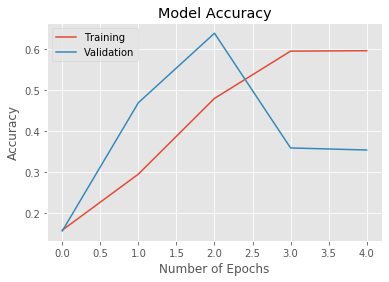

In [58]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

We should not judge our model whether it is overtrained or not because of very limited data. Usually we make conclusions based on the difference in the validation loss and accuracy with train loss and accuracy.

To prevent overfitting we usually do data augmentation but in case of geosaptial data we can not do image augmentation because we have to preserve coordinates. So training with more data is the other possible option.